In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
datasetsFolder = "./Datasets"

db1 = datasetsFolder + "/part-00000-tid-2779033056155408584-f6316110-4c9a-4061-ae48-69b77c7c8c36-4-1-c000.snappy.parquet"
db1 = pd.read_parquet(db1)

db1.rename(
    columns=
    {
    'pdv': 'id_pdv',
    'premise': 'tipo_local',
    'zipcode': 'cep'
    },
    inplace=True
)

db1.head()

,id_pdv,tipo_local,categoria_pdv,cep
0,2204965430669363375,On Premise,Mexican Rest,30741
1,5211957289528622910,On Premise,Hotel/Motel,80011
2,9024493554530757353,Off Premise,Convenience,80751
3,8659197371382902429,On Premise,Restaurant,80439
4,1400854873763881130,On Premise,Restaurant,30093


In [3]:
db2 = datasetsFolder + "/part-00000-tid-5196563791502273604-c90d3a24-52f2-4955-b4ec-fb143aae74d8-4-1-c000.snappy.parquet"
db2 = pd.read_parquet(db2)

db2.rename(
    columns=
    {
    'internal_store_id': 'id_loja',
    'internal_product_id': 'id_produto',
    'distributor_id': 'id_distribuidor',
    'transaction_date': 'data_transacao',
    'reference_date': 'data_referencia',
    'quantity': 'quantidade',
    'gross_value': 'valor_bruto',
    'net_value': 'valor_liquido',
    'gross_profit': 'lucro_bruto',
    'discount': 'desconto',
    'taxes': 'impostos'
    },
    inplace=True
)

display(db2.head())
display(db2.groupby("id_loja").size())

db2.info()

,id_loja,id_produto,id_distribuidor,data_transacao,data_referencia,quantidade,valor_bruto,valor_liquido,lucro_bruto,desconto,impostos
0,7384367747233276219,328903483604537190,9,2022-07-13,2022-07-01,1.0,38.125000,37.890625,10.042625,3.950000,0.234375
1,3536908514005606262,5418855670645487653,5,2022-03-21,2022-03-01,6.0,107.250000,106.440002,24.732002,17.100000,0.810000
2,3138231730993449825,1087005562675741887,6,2022-09-06,2022-09-01,3.0,56.625000,56.220001,14.124002,5.250000,0.405000
3,3681167389484217654,1401422983880045188,5,2022-09-11,2022-09-01,129.0,1037.160023,1037.160023,156.348026,479.880006,0.000000
4,7762413312337359369,6614994347738381720,4,2022-02-18,2022-02-01,1.0,26.230000,23.950241,6.550241,0.000000,2.279758


id_loja
1000237487041964405      62
1000275275922029725      19
1000285336744471896      27
1000699279948182033       5
1001371918471115422    1827
                       ... 
996297376394222790      569
997081098753891817      193
997105059065723759      550
997413166693459372       25
997907800111849739     1745
Length: 15086, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6560698 entries, 0 to 6560697
Data columns (total 11 columns):
 #   Column           Dtype  
---  ------           -----  
 0   id_loja          object 
 1   id_produto       object 
 2   id_distribuidor  object 
 3   data_transacao   object 
 4   data_referencia  object 
 5   quantidade       float64
 6   valor_bruto      float64
 7   valor_liquido    float64
 8   lucro_bruto      float64
 9   desconto         float64
 10  impostos         float64
dtypes: float64(6), object(5)
memory usage: 550.6+ MB


In [4]:
db3 = datasetsFolder + "/part-00000-tid-7173294866425216458-eae53fbf-d19e-4130-ba74-78f96b9675f1-4-1-c000.snappy.parquet"
db3 = pd.read_parquet(db3)

db3.rename(
    columns=
    {
    'tipos': 'tipo',
    'label': 'rotulo',
    'produto': 'id_produto'
    },
    inplace=True
)

display(db3.head())
display(db3.groupby("categoria").size())

,id_produto,categoria,descricao,tipo,rotulo,subcategoria,marca,fabricante
0,2282334733936076502,Distilled Spirits,JOSEPH CARTRON CAFÉ LIQUEUR,Distilled Spirits,Core,Liqueurs & Cordials,Joseph Cartron Cafe,Spiribam
1,6091840953834683482,Distilled Spirits,SPRINGBANK 18 YEAR SINGLE MALT 700ML,Distilled Spirits,Specialty,Scotch Whisky,Springbank 18 Year Single Malt,Pacific Edge Wine & Spirits
2,1968645851245092408,Distilled Spirits,J BRANDT TRIPLE SEC 12/750ML 30PF,Distilled Spirits,Private Label,Liqueurs & Cordials,J Brandt Triple Sec,Sazerac Spirits
3,994706710729219179,Draft,REFORMATION CASHMERE IPA 1/4 KEG,Draft,In&Out,Other Draft,Reformation Cashmere Fresh Hop IPA,Reformation Brewery
4,9209550539540384349,Non-Alcohol,HELLA MOSCOW MULE 750ML,Non Alcohol,Core,Mixers,Hella Bitters Bloody Mary,Hella Bitter Llc


categoria
ABA Spirits            91
Distilled Spirits    2202
Draft                 918
Non-Alcohol           597
Package              1403
Tobacco                 2
Wine                 1879
dtype: int64

In [5]:
num_lojas_transacoes = db1['id_pdv'].nunique()
num_lojas_cadastro_pdv = db2['id_loja'].nunique()

print(f"Lojas únicas nas Transações: {num_lojas_transacoes}")
print(f"Lojas únicas no Cadastro de PDVs: {num_lojas_cadastro_pdv}")
print(f"Lojas 'órfãs' (sem cadastro): {num_lojas_cadastro_pdv - num_lojas_transacoes}")

Lojas únicas nas Transações: 14419
Lojas únicas no Cadastro de PDVs: 15086
Lojas 'órfãs' (sem cadastro): 667


In [6]:
# --- Passo 1.1: Preparar a tabela de PDVs ---
# Renomeia a coluna 'id_pdv' em db1 para 'id_loja' para padronizar
print("Renomeando 'id_pdv' para 'id_loja' na tabela de cadastro...")
db1 = db1.rename(columns={'id_pdv': 'id_loja'})
print("Coluna renomeada com sucesso.")
print("-" * 50)


# --- Passo 1.2: Unificar Transações com Produtos ---
# Juntamos as transações (db2) com os detalhes dos produtos (df_produtos)
# Usamos 'how="left"' para garantir que nenhuma transação seja perdida
print("Juntando transações com os detalhes dos produtos...")
df_unificado_parcial = pd.merge(
    left=db2,
    right=db3,
    on='id_produto',
    how='left'
)
print(f"Merge parcial concluído. O DataFrame agora tem {df_unificado_parcial.shape[1]} colunas.")
print("-" * 50)


# --- Passo 1.3: Unificar o resultado com os dados das Lojas (PDVs) ---
# Agora, juntamos o resultado anterior com os dados cadastrais das lojas (db1)
print("Juntando o resultado com os dados cadastrais das lojas...")
df_final = pd.merge(
    left=df_unificado_parcial,
    right=db1,
    on='id_loja',
    how='left'
)
print("Merge final concluído!")
print("-" * 50)


# --- Verificação Final ---
print(f"O seu DataFrame final unificado tem {df_final.shape[0]} linhas e {df_final.shape[1]} colunas.")
print("\nColunas do DataFrame final:")
print(df_final.columns.tolist())

print("\nVisualização das primeiras linhas do DataFrame unificado:")
display(df_final.head())

# Verificando as transações de lojas 'órfãs' (que ficaram com dados nulos)
lojas_orfas = df_final[df_final['categoria_pdv'].isnull()]
print(f"\nEncontradas {len(lojas_orfas)} transações de lojas sem cadastro no PDV (valores nulos).")

Renomeando 'id_pdv' para 'id_loja' na tabela de cadastro...
Coluna renomeada com sucesso.
--------------------------------------------------
Juntando transações com os detalhes dos produtos...
Merge parcial concluído. O DataFrame agora tem 18 colunas.
--------------------------------------------------
Juntando o resultado com os dados cadastrais das lojas...
Merge final concluído!
--------------------------------------------------
O seu DataFrame final unificado tem 6560698 linhas e 21 colunas.

Colunas do DataFrame final:
['id_loja', 'id_produto', 'id_distribuidor', 'data_transacao', 'data_referencia', 'quantidade', 'valor_bruto', 'valor_liquido', 'lucro_bruto', 'desconto', 'impostos', 'categoria', 'descricao', 'tipo', 'rotulo', 'subcategoria', 'marca', 'fabricante', 'tipo_local', 'categoria_pdv', 'cep']

Visualização das primeiras linhas do DataFrame unificado:


,id_loja,id_produto,id_distribuidor,data_transacao,data_referencia,quantidade,valor_bruto,valor_liquido,lucro_bruto,desconto,...,categoria,descricao,tipo,rotulo,subcategoria,marca,fabricante,tipo_local,categoria_pdv,cep
0,7384367747233276219,328903483604537190,9,2022-07-13,2022-07-01,1.0,38.125000,37.890625,10.042625,3.950000,...,Package,BUD LIGHT CHELADA FUEGO 15/25 CN,Package,Core,Specialty,Bud Light Chelada Fuego,AB Anheuser Busch Inc,Off Premise,Package/Liquor,80905.0
1,3536908514005606262,5418855670645487653,5,2022-03-21,2022-03-01,6.0,107.250000,106.440002,24.732002,17.100000,...,Package,MICHELOB ULTRA 18/12 CN,Package,Core,Lager,Michelob Ultra,AB Anheuser Busch Inc,Off Premise,Package/Liquor,80239.0
2,3138231730993449825,1087005562675741887,6,2022-09-06,2022-09-01,3.0,56.625000,56.220001,14.124002,5.250000,...,Package,BUD LIGHT LIME 18/12 CN,Package,Core,Lager,Bud Light Lime,AB Anheuser Busch Inc,Off Premise,Package/Liquor,80634.0
3,3681167389484217654,1401422983880045188,5,2022-09-11,2022-09-01,129.0,1037.160023,1037.160023,156.348026,479.880006,...,Distilled Spirits,99 BUTTERSCOTCH 12/10/50ML 99PF,Allocated Spirits,None,Liqueurs & Cordials,99 Butterscotch,Sazerac Spirits,Off Premise,Package/Liquor,80226.0
4,7762413312337359369,6614994347738381720,4,2022-02-18,2022-02-01,1.0,26.230000,23.950241,6.550241,0.000000,...,Package,NB VOODOO RANGER IMPERIAL IPA 15/19.2 CN,Package,Core,IPA,New Belgium Voodoo Ranger Imperial IPA,NB New Belgium,Off Premise,Convenience,30096.0



Encontradas 45582 transações de lojas sem cadastro no PDV (valores nulos).


In [7]:
# Faz uma cópia do DataFrame para segurança (boa prática)
df_tratado = df_final.copy()

# Estratégia 1: Tratar nulos das colunas de PDV
print("Tratando nulos das colunas de PDV...")
df_tratado['tipo_local'] = df_tratado['tipo_local'].fillna('Desconhecido')
df_tratado['categoria_pdv'] = df_tratado['categoria_pdv'].fillna('Desconhecido')
df_tratado['cep'] = df_tratado['cep'].fillna(0) # Usando 0 para CEP desconhecido

# Estratégia 2: Tratar nulos das colunas de Produtos
print("Tratando nulos das colunas de Produtos...")
df_tratado['rotulo'] = df_tratado['rotulo'].fillna('Nao Informado')
df_tratado['subcategoria'] = df_tratado['subcategoria'].fillna('Nao Informado')

print("\nTratamento de valores nulos concluído sem avisos!")

# Verificação Final
contagem_final_nulos = df_tratado.isnull().sum()
print("\nContagem de nulos após o tratamento (apenas colunas com nulos):")
print(contagem_final_nulos[contagem_final_nulos > 0])

Tratando nulos das colunas de PDV...
Tratando nulos das colunas de Produtos...

Tratamento de valores nulos concluído sem avisos!

Contagem de nulos após o tratamento (apenas colunas com nulos):
Series([], dtype: int64)


C:\Users\pedro.rebello\AppData\Local\Temp\ipykernel_14036\1277255634.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categorias.index, y=top_categorias.values, palette='viridis')


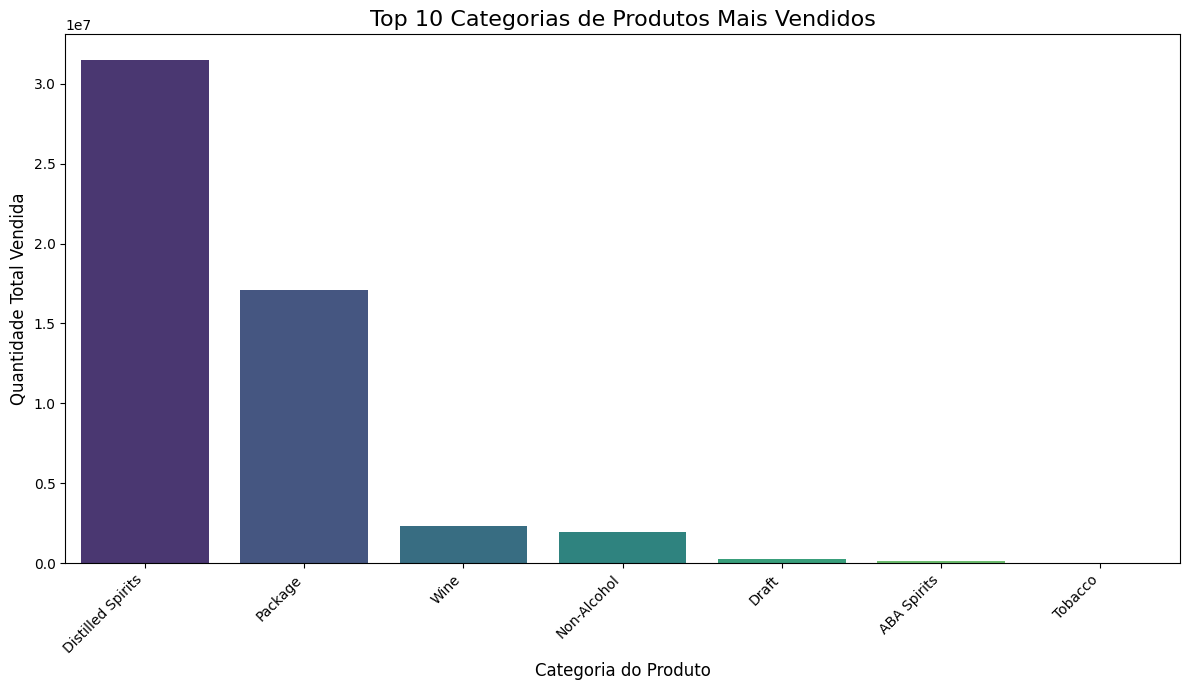

In [8]:
# Garante que o DataFrame está ordenado por data
df_tratado = df_tratado.sort_values(by='data_transacao')

# 1. Agrupa por categoria e soma a quantidade
top_categorias = df_tratado.groupby('categoria')['quantidade'].sum().sort_values(ascending=False).head(10)

# 2. Cria o gráfico
plt.figure(figsize=(12, 7)) # Define o tamanho da figura
sns.barplot(x=top_categorias.index, y=top_categorias.values, palette='viridis')

plt.title('Top 10 Categorias de Produtos Mais Vendidos', fontsize=16)
plt.xlabel('Categoria do Produto', fontsize=12)
plt.ylabel('Quantidade Total Vendida', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotaciona os rótulos do eixo X para não sobrepor
plt.tight_layout() # Ajusta o layout para tudo caber direitinho
plt.show()

C:\Users\pedro.rebello\AppData\Local\Temp\ipykernel_14036\3085384650.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_lucro_categorias.index, y=top_lucro_categorias.values, palette='viridis')


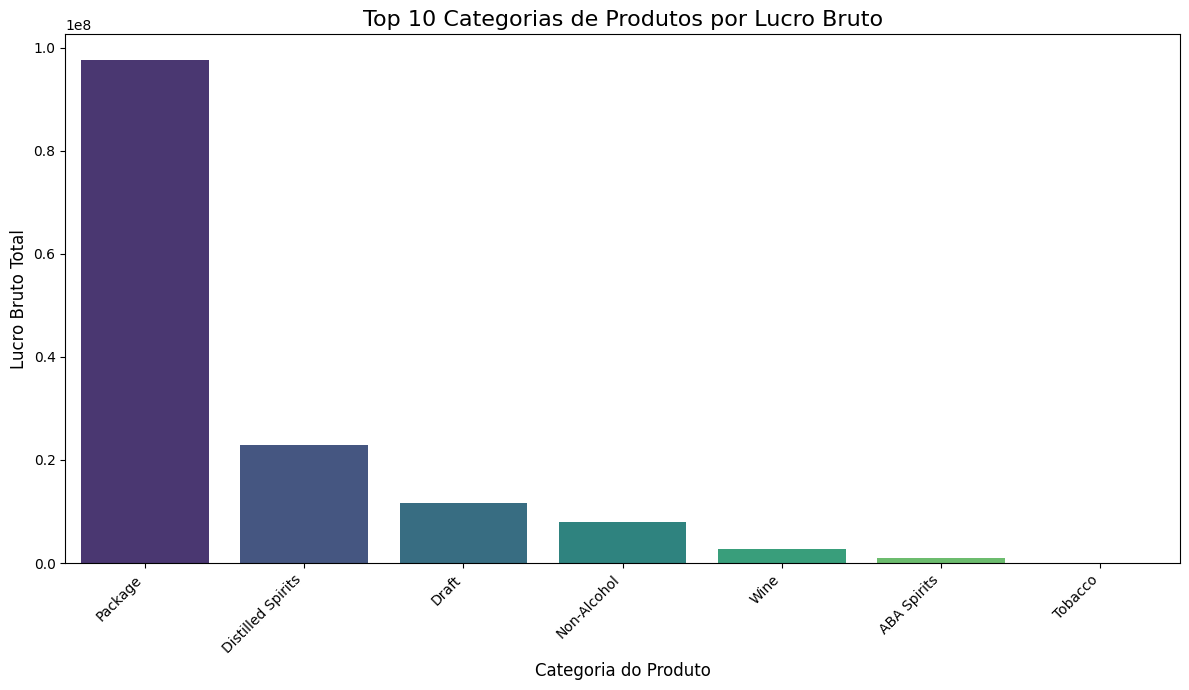

In [9]:
# Garante que o DataFrame está ordenado por data (boa prática, mas não estritamente necessário para este gráfico de soma total)
df_tratado = df_tratado.sort_values(by='data_transacao')

# 1. Agrupa por categoria e soma o lucro bruto
top_lucro_categorias = df_tratado.groupby('categoria')['lucro_bruto'].sum().sort_values(ascending=False).head(10)

# 2. Cria o gráfico
plt.figure(figsize=(12, 7)) # Define o tamanho da figura
sns.barplot(x=top_lucro_categorias.index, y=top_lucro_categorias.values, palette='viridis')

plt.title('Top 10 Categorias de Produtos por Lucro Bruto', fontsize=16)
plt.xlabel('Categoria do Produto', fontsize=12)
plt.ylabel('Lucro Bruto Total', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotaciona os rótulos do eixo X para não sobrepor
plt.tight_layout() # Ajusta o layout para tudo caber direitinho
plt.show()

C:\Users\pedro.rebello\AppData\Local\Temp\ipykernel_14036\2943536069.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='mes_nome', y='total_quantidade', data=vendas_por_mes, palette='Blues', ax=axes[0])
C:\Users\pedro.rebello\AppData\Local\Temp\ipykernel_14036\2943536069.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='mes_nome', y='total_lucro_bruto', data=vendas_por_mes, palette='Greens', ax=axes[1])


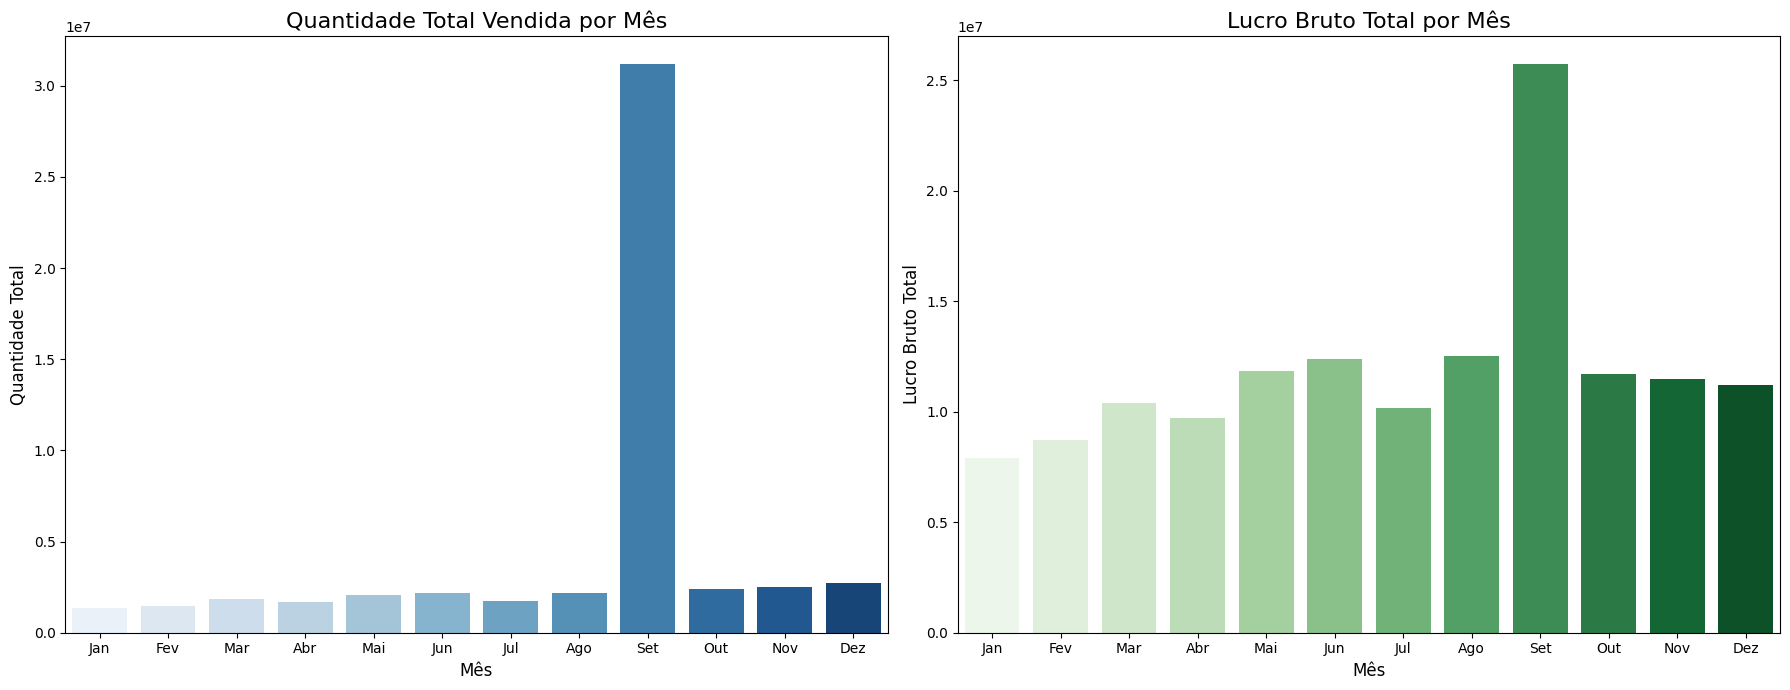

In [10]:
# Certifique-se de que 'data_transacao' está em formato datetime
df_tratado['data_transacao'] = pd.to_datetime(df_tratado['data_transacao'])

# Extrai o mês da data
df_tratado['mes_transacao'] = df_tratado['data_transacao'].dt.month

# Agrupa por mês e soma a quantidade e o lucro bruto
vendas_por_mes = df_tratado.groupby('mes_transacao').agg(
    total_quantidade=('quantidade', 'sum'),
    total_lucro_bruto=('lucro_bruto', 'sum')
).reset_index()

# Mapeia os números dos meses para nomes para melhor legibilidade no gráfico
nomes_meses = {
    1: 'Jan', 2: 'Fev', 3: 'Mar', 4: 'Abr', 5: 'Mai', 6: 'Jun',
    7: 'Jul', 8: 'Ago', 9: 'Set', 10: 'Out', 11: 'Nov', 12: 'Dez'
}
vendas_por_mes['mes_nome'] = vendas_por_mes['mes_transacao'].map(nomes_meses)

# Cria os subplots (dois gráficos um ao lado do outro)
fig, axes = plt.subplots(1, 2, figsize=(18, 7)) # 1 linha, 2 colunas

# Gráfico de Quantidade por Mês
sns.barplot(x='mes_nome', y='total_quantidade', data=vendas_por_mes, palette='Blues', ax=axes[0])
axes[0].set_title('Quantidade Total Vendida por Mês', fontsize=16)
axes[0].set_xlabel('Mês', fontsize=12)
axes[0].set_ylabel('Quantidade Total', fontsize=12)

# Gráfico de Lucro Bruto por Mês
sns.barplot(x='mes_nome', y='total_lucro_bruto', data=vendas_por_mes, palette='Greens', ax=axes[1])
axes[1].set_title('Lucro Bruto Total por Mês', fontsize=16)
axes[1].set_xlabel('Mês', fontsize=12)
axes[1].set_ylabel('Lucro Bruto Total', fontsize=12)

plt.tight_layout()
plt.show()

C:\Users\pedro.rebello\AppData\Local\Temp\ipykernel_14036\3627968484.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='dia_nome', y='total_quantidade', data=vendas_por_dia, palette='Purples', ax=axes[0])
C:\Users\pedro.rebello\AppData\Local\Temp\ipykernel_14036\3627968484.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='dia_nome', y='total_lucro_bruto', data=vendas_por_dia, palette='Oranges', ax=axes[1])


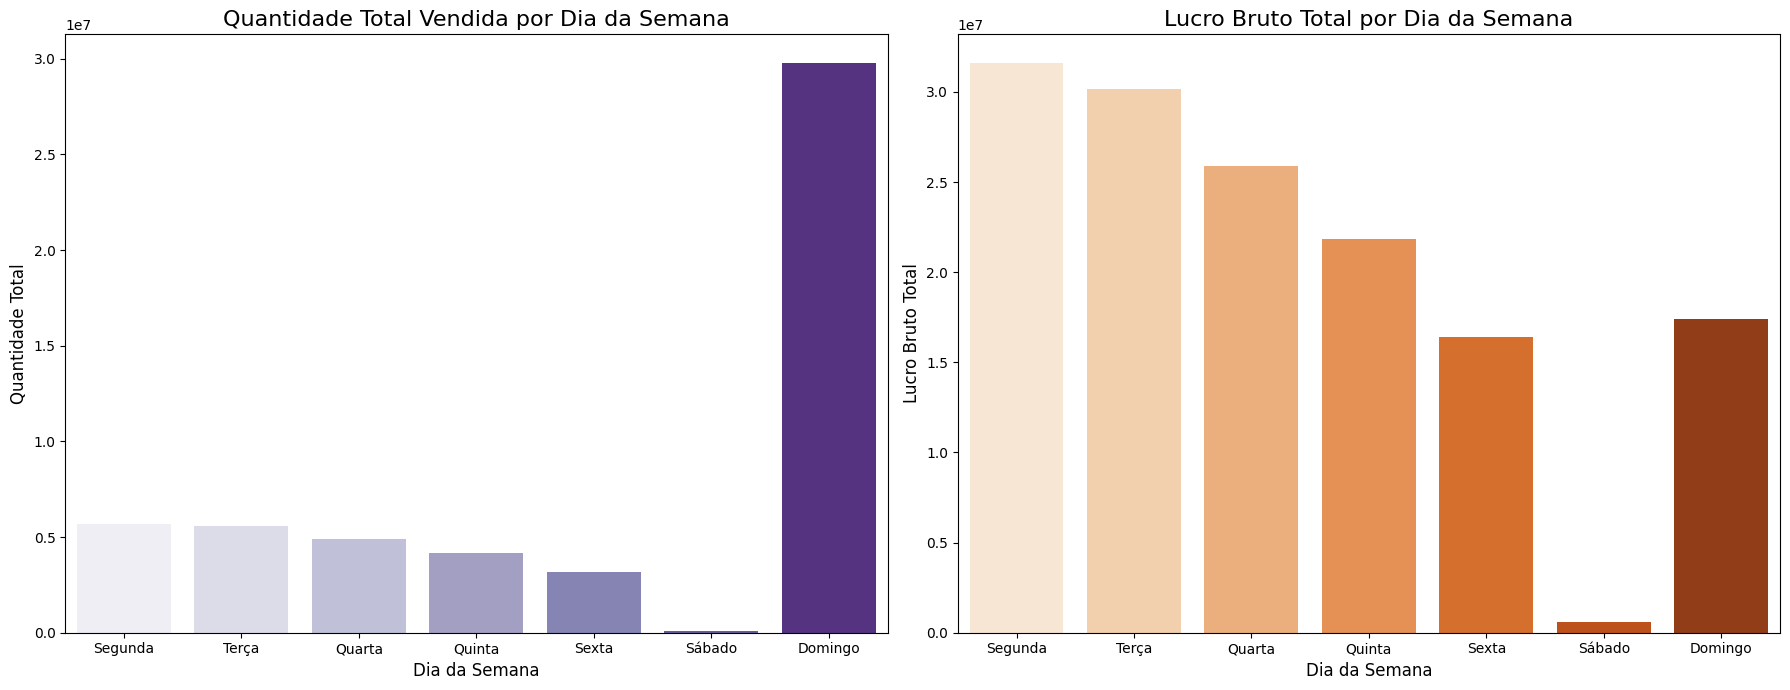

In [11]:
# Certifique-se de que 'data_transacao' está em formato datetime
df_tratado['data_transacao'] = pd.to_datetime(df_tratado['data_transacao'])

# Extrai o dia da semana (0=Segunda, 6=Domingo)
df_tratado['dia_semana'] = df_tratado['data_transacao'].dt.dayofweek

# Agrupa por dia da semana e soma a quantidade e o lucro bruto
vendas_por_dia = df_tratado.groupby('dia_semana').agg(
    total_quantidade=('quantidade', 'sum'),
    total_lucro_bruto=('lucro_bruto', 'sum')
).reset_index()

# Mapeia os números dos dias da semana para nomes
nomes_dias = {
    0: 'Segunda', 1: 'Terça', 2: 'Quarta', 3: 'Quinta',
    4: 'Sexta', 5: 'Sábado', 6: 'Domingo'
}
vendas_por_dia['dia_nome'] = vendas_por_dia['dia_semana'].map(nomes_dias)

# Cria os subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Gráfico de Quantidade por Dia da Semana
sns.barplot(x='dia_nome', y='total_quantidade', data=vendas_por_dia, palette='Purples', ax=axes[0])
axes[0].set_title('Quantidade Total Vendida por Dia da Semana', fontsize=16)
axes[0].set_xlabel('Dia da Semana', fontsize=12)
axes[0].set_ylabel('Quantidade Total', fontsize=12)

# Gráfico de Lucro Bruto por Dia da Semana
sns.barplot(x='dia_nome', y='total_lucro_bruto', data=vendas_por_dia, palette='Oranges', ax=axes[1])
axes[1].set_title('Lucro Bruto Total por Dia da Semana', fontsize=16)
axes[1].set_xlabel('Dia da Semana', fontsize=12)
axes[1].set_ylabel('Lucro Bruto Total', fontsize=12)

plt.tight_layout()
plt.show()

C:\Users\pedro.rebello\AppData\Local\Temp\ipykernel_14036\566680562.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categorias_pdv.index, y=top_categorias_pdv.values, palette='coolwarm')


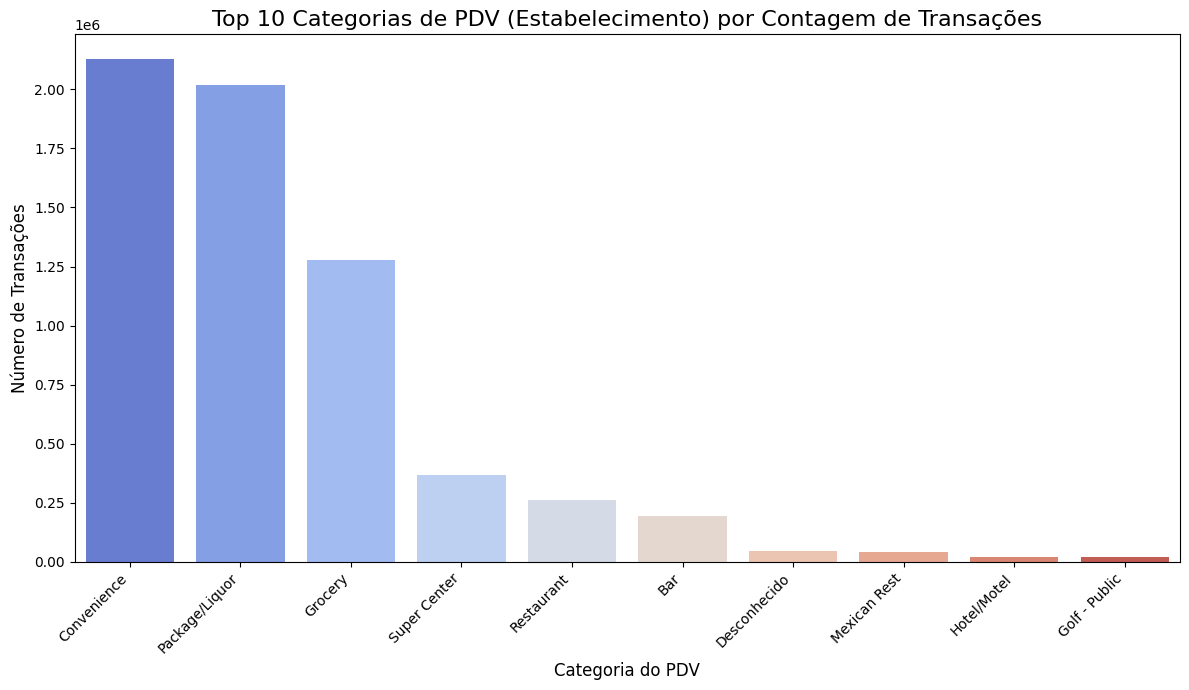

In [12]:
# Agrupa por categoria de PDV e conta as ocorrências (ou soma algo, como quantidade)
top_categorias_pdv = df_tratado['categoria_pdv'].value_counts().head(10)

plt.figure(figsize=(12, 7))
sns.barplot(x=top_categorias_pdv.index, y=top_categorias_pdv.values, palette='coolwarm')
plt.title('Top 10 Categorias de PDV (Estabelecimento) por Contagem de Transações', fontsize=16)
plt.xlabel('Categoria do PDV', fontsize=12)
plt.ylabel('Número de Transações', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()